In [1]:
import numpy as np
import acalib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
c = acalib.Container()
c.load_fits('../../bindata/fits/cubes/Orion.methanol.cbc.contsub.image.fits')
#c.load_fits('../../bindata/fits/cubes/M100line.image.fits')

cube = c.primary

#Better results with threshold
rms = acalib.noise_level(cube)
cube = acalib.denoise(cube, threshold=rms)

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


In [3]:
#Creating Spectra Sketcher
import acalib.core as cr
spectra,slices= cr.spectra_sketch(cube.data,10000)

[slice(0, 26, None)]

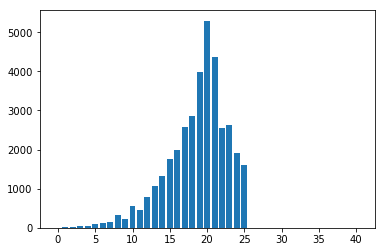

In [4]:
#Getting frecuencies
xs = cube.data.shape[1]
ys = cube.data.shape[2]
frecs_len = cube.data.shape[0]
frecs = range(frecs_len)

#Plotting spectra
plt.bar(frecs,spectra)
slices

In [22]:
idx=acalib.Indexing()
print(idx.config)
idx.config['PRECISION']=0.001
idx.config['SAMPLES']=int(100)
result=idx.run(cube)

{'P': 0.05, 'PRECISION': 0.02, 'RANDOM_STATE': None, 'SAMPLES': 1000}


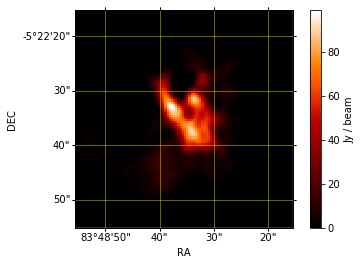

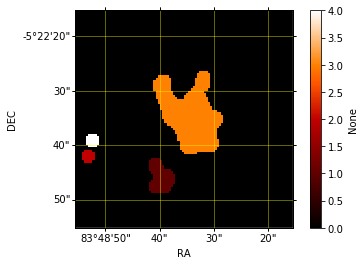

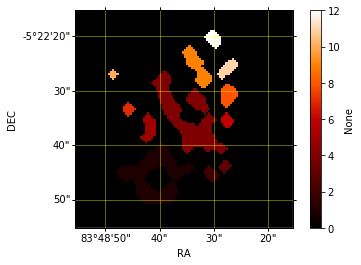

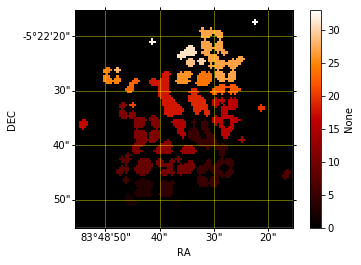

In [23]:
for i,roi in enumerate(result):
    acalib.visualize(roi.cube_slice)
    for j, im in enumerate(roi.segmented_images):
        acalib.visualize(im)